# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import pimmslearn
import pimmslearn.databases.diseases

logger = pimmslearn.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
pimmslearn.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "DAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = pimmslearn.nb.get_params(args, globals=globals())
args = pimmslearn.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = pimmslearn.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'DAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.642  1  1.313 0.253 0.007   
                             age        0.016  1  0.032 0.858 0.000   
                             Kiel       1.617  1  3.309 0.070 0.017   
                             Magdeburg  4.392  1  8.985 0.003 0.045   
                             Sweden     7.840  1 16.041 0.000 0.077   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.000  1  0.000 0.984 0.000   
                             age        2.274  1  2.065 0.152 0.011   
                             Kiel       0.033  1  0.030 0.863 0.000   
                             Magdeburg  3.339  1  3.033 0.083 0.016   
                             Sweden    19.420  1 17.640 0.000 0.085   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.596  0.409    False  
                             age               0.067  0.918    False  
                             Kiel              1.152  0.159    False  
                             Magdeburg         2.511  0.013     True  
                             Sweden            4.052  0.001     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.007  0.991    False  
                             age               0.817  0.284    False  
                             Kiel              0.064  0.921    False  
                             Magdeburg         1.080  0.181    False  
                             Sweden            4.388  0.000     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     DAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.071  1  7.738 0.006 0.039   
                             age        0.005  1  0.038 0.846 0.000   
                             Kiel       0.281  1  2.030 0.156 0.011   
                             Magdeburg  0.502  1  3.627 0.058 0.019   
                             Sweden     1.760  1 12.715 0.000 0.062   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         2.727  1  4.903 0.028 0.025   
                             age        0.599  1  1.076 0.301 0.006   
                             Kiel       3.076  1  5.531 0.020 0.028   
                             Magdeburg  3.915  1  7.040 0.009 0.036   
                             Sweden    27.008  1 48.566 0.000 0.203   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.225  0.017     True  
                             age               0.073  0.897    False  
                             Kiel              0.807  0.256    False  
                             Magdeburg         1.234  0.116    False  
                             Sweden            3.339  0.002     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.553  0.063    False  
                             age               0.522  0.430    False  
                             Kiel              1.705  0.047     True  
                             Magdeburg         2.063  0.023     True  
                             Sweden           10.298  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                    DAE                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.006         2.225  0.017     True   
                             Kiel      0.156         0.807  0.256    False   
                             Magdeburg 0.058         1.234  0.116    False   
                             Sweden    0.000         3.339  0.002     True   
                             age       0.846         0.073  0.897    False   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.028         1.553  0.063    False   
                             Kiel      0.020         1.705  0.047     True   
                             Magdeburg 0.009         2.063  0.023     True   
                             Sweden    0.000        10.298  0.000     True   
                             age       0.301         0.522  0.430    False   

model                                     PI                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.253         0.596  0.409    False  
                             Kiel      0.070         1.152  0.159    False  
                             Magdeburg 0.003         2.511  0.013     True  
                             Sweden    0.000         4.052  0.001     True  
                             age       0.858         0.067  0.918    False  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.984         0.007  0.991    False  
                             Kiel      0.863         0.064  0.921    False  
                             Magdeburg 0.083         1.080  0.181    False  
                             Sweden    0.000         4.388  0.000     True  
                             age       0.152         0.817  0.284    False  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = pimmslearn.nb.Config.from_dict(
    pimmslearn.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'DAE': 'DAE', 'PI': 'PI'}

## Describe scores

In [10]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.222         3.382     0.274     0.260         2.488     0.336
std       0.293         6.434     0.319     0.303         5.377     0.331
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.000         0.414     0.002     0.004         0.332     0.015
50%       0.057         1.243     0.114     0.116         0.934     0.233
75%       0.386         3.367     0.514     0.465         2.436     0.620
max       0.999        86.514     0.999     1.000       148.101     1.000

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

/tmp/ipykernel_48164/3761369923.py:2: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  scores.to_excel(writer, 'scores', **writer_args)


model                                                       DAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.006         2.225   
A0A024R0T9;K7ER74;P02655                           AD     0.032         1.497   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.346         0.461   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.255         0.594   
A0A075B6H7                                         AD     0.005         2.271   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.280         0.553   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.918         0.037   
S4R3U6                                             AD     0.028         1.553   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.017     True   
A0A024R0T9;K7ER74;P02655                           AD      0.070    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.475    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.377    False   
A0A075B6H7                                         AD      0.016     True   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.281    False   
Q9Y6X5                                             AD      0.407    False   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.155    False   
Q9Y6Y9                                             AD      0.946    False   
S4R3U6                                             AD      0.063    False   

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.253         0.596   
A0A024R0T9;K7ER74;P02655                           AD     0.053         1.277   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.064         1.195   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.594         0.226   
A0A075B6H7                                         AD     0.103         0.987   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.015         1.824   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.139         0.855   
S4R3U6                                             AD     0.984         0.007   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.409    False  
A0A024R0T9;K7ER74;P02655                           AD      0.127    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.147    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.728    False  
A0A075B6H7                                         AD      0.213    False  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model       DAE                                PI                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.233         1.640     0.292     0.258         1.396     0.339
std       0.288         1.905     0.313     0.295         1.620     0.319
min       0.000         0.001     0.000     0.000         0.000     0.000
25%       0.006         0.401     0.018     0.013         0.356     0.040
50%       0.083         1.081     0.154     0.125         0.902     0.246
75%       0.397         2.213     0.525     0.441         1.901     0.600
max       0.998        23.434     0.998     1.000        20.814     1.000

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,DAE,PI
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,916,1038


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

DAE                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.006         2.225  0.017   
A0A024R0T9;K7ER74;P02655                           0.032         1.497  0.070   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.346         0.461  0.475   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.255         0.594  0.377   
A0A075B6H7                                         0.005         2.271  0.016   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.281   
Q9Y6X5                                             0.280         0.553  0.407   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.155   
Q9Y6Y9                                             0.918         0.037  0.946   
S4R3U6                                             0.028         1.553  0.063   

                                                               PI  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                           True 0.253   
A0A024R0T9;K7ER74;P02655                              False 0.053   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.064   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.594   
A0A075B6H7                                             True 0.103   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                False 0.015   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.139   
S4R3U6                                                False 0.984   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               0.596  0.409   
A0A024R0T9;K7ER74;P02655                                   1.277  0.127   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         1.195  0.147   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.226  0.728   
A0A075B6H7                                                 0.987  0.213   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.317   
Q9Y6X5                                                     1.824  0.047   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.181   
Q9Y6Y9                                                     0.855  0.266   
S4R3U6                                                     0.007  0.991   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                          False       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                            False        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                 True       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                              

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
DAE (no)  - PI (no)    870
DAE (yes) - PI (yes)   337
DAE (yes) - PI (no)    168
DAE (no)  - PI (yes)    46
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

/tmp/ipykernel_48164/1417621106.py:6: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  _to_write.to_excel(writer, 'differences', **writer_args)
root - INFO     Writen to Excel file under sheet 'differences'.


DAE                                  PI  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.006         2.225  0.017     True 0.253   
A0A075B6H7                   0.005         2.271  0.016     True 0.103   
A0A075B6I0                   0.001         3.177  0.003     True 0.034   
A0A075B6J9                   0.013         1.885  0.033     True 0.067   
A0A075B6R2                   0.001         3.282  0.002     True 0.430   
...                            ...           ...    ...      ...   ...   
Q9UJ14                       0.016         1.792  0.040     True 0.074   
Q9UP79                       0.000         4.840  0.000     True 0.131   
Q9UQ52                       0.000         3.418  0.002     True 0.047   
Q9Y6C2                       0.003         2.580  0.008     True 0.479   
Q9Y6X5                       0.280         0.553  0.407    False 0.015   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         0.596  0.409    False       186  
A0A075B6H7                           0.987  0.213    False        91  
A0A075B6I0                           1.462  0.091    False       194  
A0A075B6J9                           1.172  0.153    False       156  
A0A075B6R2                           0.366  0.591    False       164  
...                                    ...    ...      ...       ...  
Q9UJ14                               1.128  0.166    False       169  
Q9UP79                               0.882  0.255    False       135  
Q9UQ52                               1.324  0.117    False       188  
Q9Y6C2                               0.319  0.633    False       119  
Q9Y6X5                               1.824  0.047     True       173  

[214 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,DAE,PI,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.017,0.409,186,DAE (yes) - PI (no)
A0A024R0T9;K7ER74;P02655,0.070,0.127,195,DAE (no) - PI (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.475,0.147,174,DAE (no) - PI (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.377,0.728,196,DAE (no) - PI (no)
A0A075B6H7,0.016,0.213,91,DAE (yes) - PI (no)
...,...,...,...,...
Q9Y6R7,0.281,0.317,197,DAE (no) - PI (no)
Q9Y6X5,0.407,0.047,173,DAE (no) - PI (yes)
Q9Y6Y8;Q9Y6Y8-2,0.155,0.181,197,DAE (no) - PI (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,DAE,PI,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
P17931,0.012,0.999,174,DAE (yes) - PI (no),0.988
D6RF35,0.043,0.992,57,DAE (yes) - PI (no),0.949
O00187;O00187-2,0.031,0.975,119,DAE (yes) - PI (no),0.943
Q96RW7;Q96RW7-2,0.986,0.043,80,DAE (no) - PI (yes),0.943
A0A087WU43;A0A087WX17;A0A087WXI5;P12830;P12830-2,0.000,0.943,134,DAE (yes) - PI (no),0.943
...,...,...,...,...,...
Q9NX62,0.045,0.055,197,DAE (yes) - PI (no),0.011
P00740;P00740-2,0.042,0.052,197,DAE (yes) - PI (no),0.010
K7ERG9;P00746,0.041,0.052,197,DAE (yes) - PI (no),0.010


### Differences plotted with created annotations

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_1_DAE


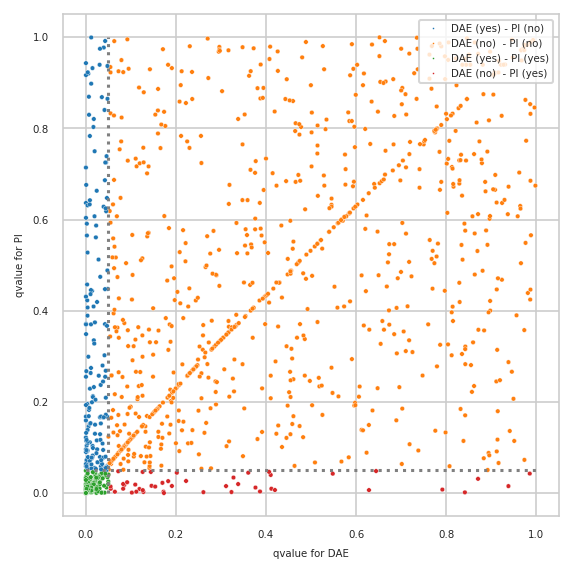

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
pimmslearn.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

pimmslearn.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_DAE/diff_analysis_comparision_2_DAE


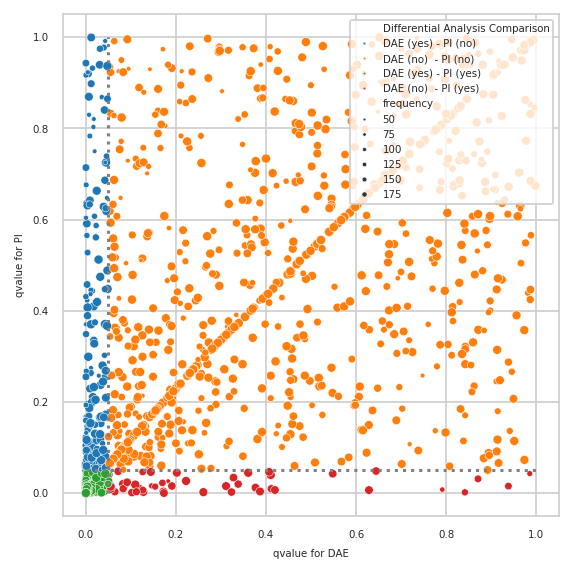

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
pimmslearn.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = pimmslearn.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

pimmslearn.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
APOE,ENSP00000252486,5.000
PSEN1,ENSP00000326366,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
AP1M2,ENSP00000465685,0.682
CRISPLD2,ENSP00000262424,0.681
PRSS23,ENSP00000280258,0.681


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

/home/runner/work/pimms/pimms/project/.snakemake/conda/6192e93206804e092b1c71b91535a817_/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out